In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train  = pd.read_csv('train_E6oV3lV.csv') 
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
train[train['label']==1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [6]:
train.shape,test.shape

((31962, 3), (17197, 2))

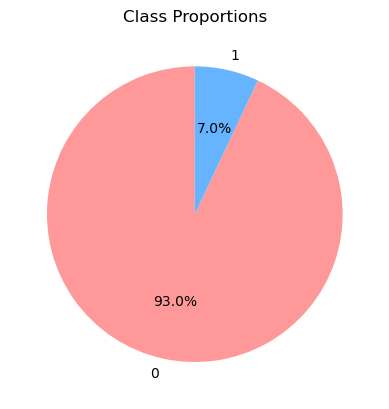

In [12]:
class_counts=train['label'].value_counts()

labels = class_counts.index
sizes = class_counts.values
colors = ['#ff9999', '#66b3ff']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Class Proportions")
plt.show()

#Imbalanced datasets can lead to biased models that are skewed toward the majority class,
#often ignoring the minority class (in this case, racist/sexist tweets). 
#It's crucial to address this issue to create an effective classifier.

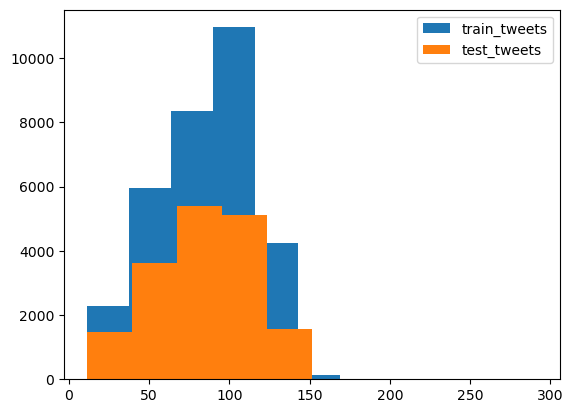

In [27]:
train_length = train['tweet'].str.len()
test_length = test['tweet'].str.len()
plt.hist(train_length,bins=10,label="train_tweets")
plt.hist(test_length,bins=10,label="test_tweets")
plt.legend()
plt.show()
#check the distribution of length of the tweets, in terms of words, in both train and test data.

In [14]:
combi = pd.concat([test,train], ignore_index=True,sort=False)
combi.shape, 31962+17197

((49159, 3), 49159)

In [12]:
combi.head()

,id,tweet,label
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,NaN
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,NaN
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!,NaN
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite",NaN
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦",NaN


In [13]:
combi.tail()

,id,tweet,label
49154,31958,ate @user isz that youuu?ðððððððððâ¤ï¸,0.0
49155,31959,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,0.0
49156,31960,listening to sad songs on a monday morning otw to work is sad,0.0
49157,31961,"@user #sikh #temple vandalised in in #calgary, #wso condemns act",1.0
49158,31962,thank you @user for you follow,0.0


In [15]:
def clean_tweet(tweet):
    tweet = tweet.lower()

    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)

    # Remove mentions
    tweet = re.sub(r'@\w+', '', tweet)

    # Remove hashtags but keep the word
    tweet = re.sub(r'#', '', tweet)

    # Remove special characters and numbers
    tweet = re.sub(r'[^a-z\s]', '', tweet)

    # Tokenize the text
    words = word_tokenize(tweet)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]

    # Stemming (optional)
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]

    # Lemmatization (optional)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]

    # Join words back into a single cleaned text
    cleaned_tweet = ' '.join(words)
    
    return cleaned_tweet
